# Credit card fraud detection capstone project

This jupyter notebook presents the implementation of credit card fraud detection technique based on Machile Learning models.

### Loading the packages and the data used in the project.

In [1]:
#Importing all packages necessary to implement the classification in fraud or non-fraud.
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score


#pd.set_option('display.max_rows',None)
pd.reset_option("display.max_rows")
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
#Importing the dataset used to train and test the machine learning models
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

In [3]:
#Let's explore the fraud data used in this project
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
#Let's know the shape of the data
fraudPD.shape

(590540, 394)

In [5]:
#It is very important to check the amount of null values to determine how to take care of them.
fraudPD.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [6]:
#This cell changes the timestamp datetime to a readable date format.
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [7]:
#Let's separate the month to calculate the transaction amount by month. 
fraudPD['month'] = pd.to_datetime(fraudPD['time']).dt.strftime('%B')
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July'] #, 'August', 'September', 'October', 'November', 'December']
dfMonthAmount=fraudPD[['month','TransactionAmt']].groupby('month').agg('sum').reindex(new_order, axis=0).reset_index()

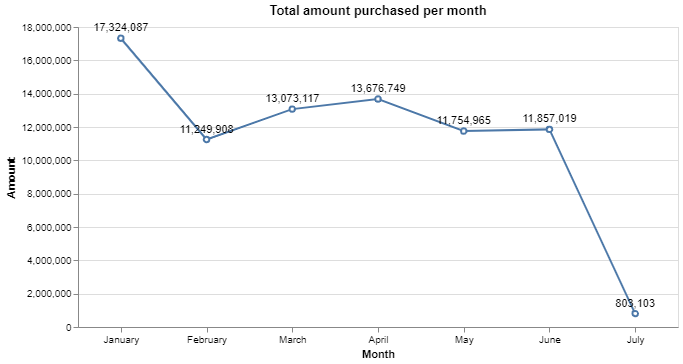

In [42]:
#A line chart can show the total amount values by month.
line_chart=alt.Chart(dfMonthAmount).mark_line(
    point={"filled": False, "fill": "white"}).encode(
    x=alt.X('month:N', axis=alt.Axis(labelAngle=0), 
            sort=['January', 'February', 'March', 'April', 'May', 'June', 'July'],
            title='Month'), 
    y=alt.Y('TransactionAmt:Q', title='Amount'))

text_chart=line_chart.mark_text(dx=0, dy=-10, align='center').encode(text=alt.Text('TransactionAmt:Q', format=',.0f'))

(line_chart + text_chart).properties(height=300, width=600, title='Total amount purchased per month',)


The line chart shows the values sold in the dataset transactions for all available data (January to the beginning of July). 

In [9]:
#Grouping the data in fraud and non-fraud to check the data balance.
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']

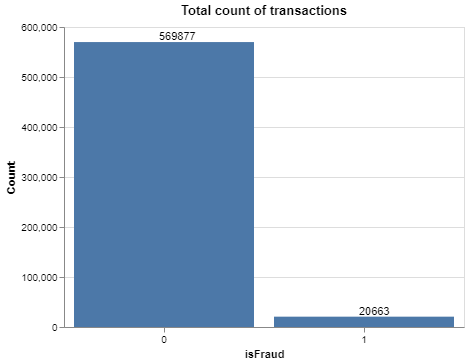

In [51]:
#Implementing a bar chart to check the data balance as fraud and non-fraud visually.
bar_chart=alt.Chart(transGroup).mark_bar().encode(
    alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), 
    alt.Y('count:Q', title='Count'))
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Total count of transactions')

The data is very unbalanced, and it must be balanced before presenting it to a machine-learning model.

### A quick exploratory data analysis.

Grouping by product code, the product for each transaction. Product isn't necessary to be a real 'product' (like one item to be added to the shopping cart). It could be any kind of service.

In [11]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']

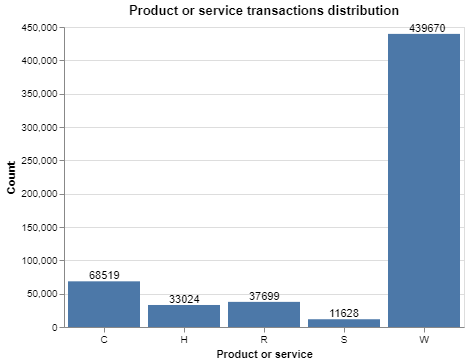

In [65]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(
    alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0), title='Product or service'), 
    alt.Y('count:Q', title='Count'))
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Product or service transactions distribution')

The bar chart illustrates the dataset distribution of product types.

In [67]:
#Grouping the data according to the card types.
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']

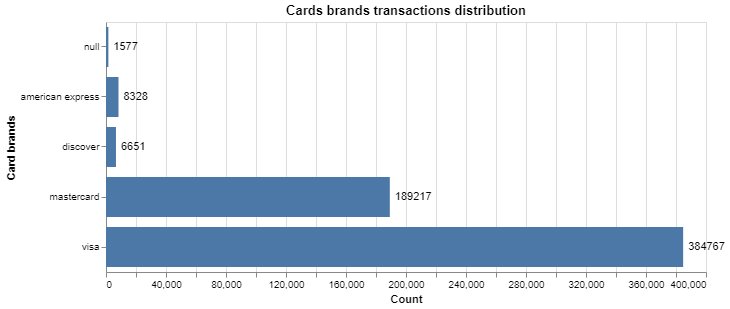

In [80]:
#The bar chart presents the amount of each credit card brand used in the transactions.
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('card4:N', title='Card brands'))
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600, title='Cards brands transactions distribution')

In [75]:
#Grouping and counting the transactions according to credit card types.
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']

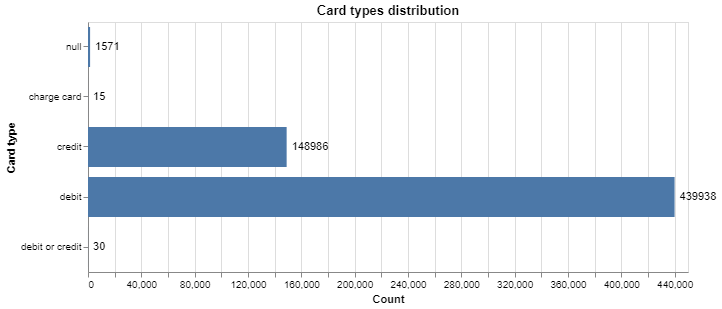

In [82]:
#Visually presenting the amount of transactions according to credit card type.
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(
    x=alt.X('count:Q', title='Count'),
    y=alt.Y('card6:N', title='Card type'))
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600, title='Card types distribution')

In [84]:
#Grouping the transactions by credit brand and transaction type (genuine or fraudulent).
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']

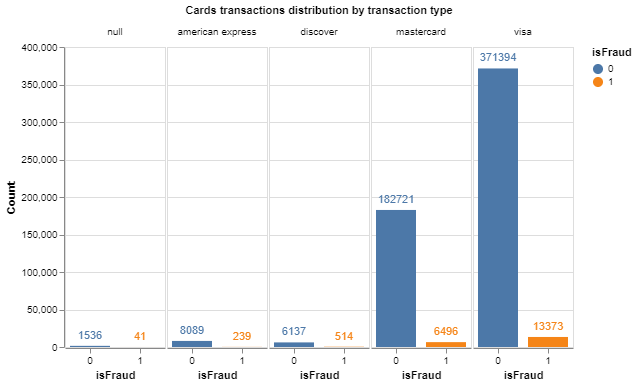

In [89]:
#Let's visually check the number of credit-type transactions that are fraudulent or genuine.
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q", title='Count'),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title='Cards transactions distribution by transaction type')
).configure_facet(spacing=0)


One can verify the number of transactions for each card brand in the graphic. Visa card is the most used one, followed by Mastercard.

In [92]:
#Let's group the transactions by card type (credit or debit) divided by fraudulent or legitimate transactions.
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']

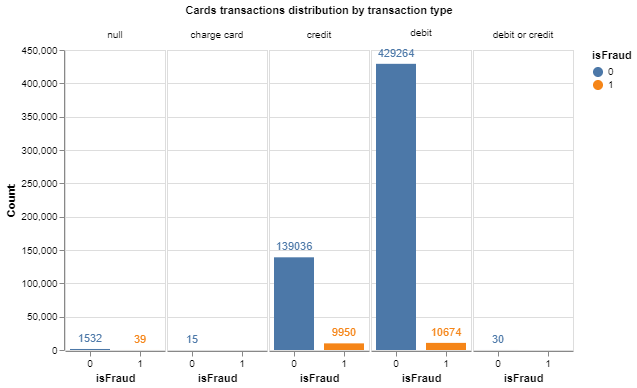

In [95]:
#One can see the distribution of transactions by card and type of transactions.
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q", title='Count'),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title='Cards transactions distribution by transaction type')
).configure_facet(spacing=0)

The graphic shows most transactions executed using debit cards followed by credit cards.

In [96]:
#One exciting piece of information compares the purchase profiles of legitimate and fraudulent transactions. 
#Let's calculate the average purchase amounts by legitimate and fraudulent transactions.
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

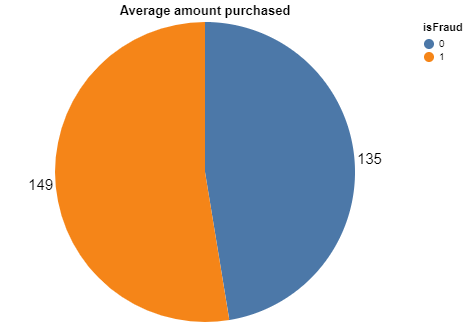

In [99]:
#One can check the purchase amount average for each kind of transaction.
pie_chart=alt.Chart(tAmountdf).mark_arc(outerRadius=150).encode(
    theta=alt.Theta("TransactionAmt:Q", stack=True),
    color=alt.Color("isFraud:N"))

bar_text = pie_chart.mark_text(radius=165, size=15,fill= "black").encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(pie_chart + bar_text).properties(title='Average amount purchased')

The graphic shows average purchase amounts for fraudulent transactions and legitimate transactions that are similar. On average, the purchases of 135 dollars are for legitimate transactions and 149 dollars for fraudulent transactions. Fraudsters usually try to simulate legitimate transactions to avoid fraudulent transaction prevention systems.

In [101]:
#Let's unpivot a wide to long format fraud data frame to have P_emaildomain and R_emaildomain as columns.
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
                  id_vars=['TransactionID'], 
               value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)

#So, one can count how many domains are present in the transactions.
fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['address','domain','count']

#Then, one can count how many transactions for the first five domain addresses.
fraudGrp = fraudMelt[['domain','count']].groupby('domain').sum().sort_values('count', ascending=False).head(5)
fraudMelt=fraudMelt.merge(fraudGrp, how='inner', on='domain')[['address','domain','count_x']]
fraudMelt.columns = ['address','domain','count']

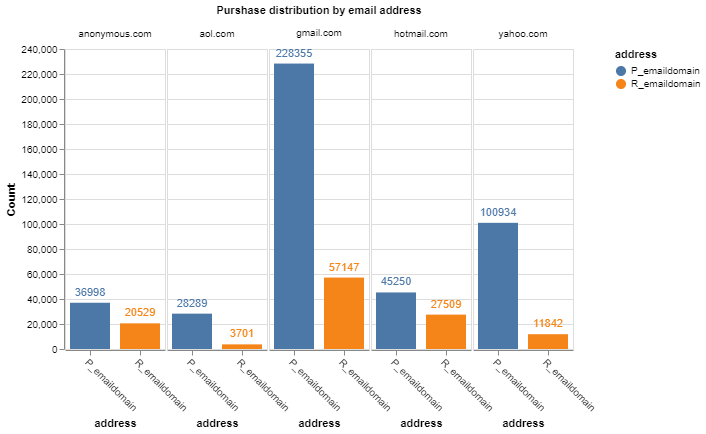

In [104]:
#Let's see the graphic of the email domain address distribution for purchasers and recipients
bar_chart = alt.Chart(fraudMelt).encode(
    alt.X("address:O", axis=alt.Axis(labelAngle=45)),
    alt.Y("count:Q", title='Count'),
    alt.Color("address:N"),
    alt.Text("count:Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("domain:N", title='Purshase distribution by email address')
).configure_facet(spacing=0)

The previous graphic presents the distribution of email addresses for purchasers and recipients by domain. One can see that the main email domains used are gmail.com, followed by yahoo.com and hotmail.com.

In [25]:
#Let's drop the null values for now. I need to understand the data better to fill the null values with information.
notnaFraud=fraudPD[['isFraud',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card4',
                'card6',
                'addr1',
                'addr2',
                'P_emaildomain',
                'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']].dropna()

In [26]:
#How many rows and columns does my not null data have?
notnaFraud.shape

(431503, 23)

In [27]:
#Now, we have no null values in the data to present to a machine learning model.
notnaFraud.isna().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card4             0
card6             0
addr1             0
addr2             0
P_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
dtype: int64

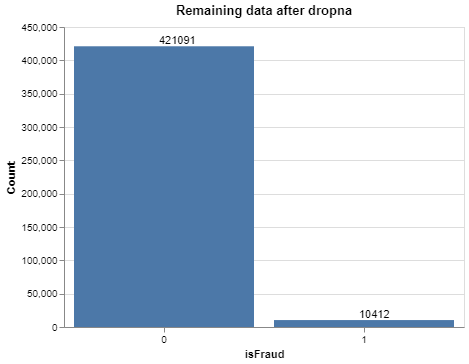

In [106]:
#After dropping the null values, this data is available to the machine learning model. 
#It is still an excellent amount of data.
bar_chart = alt.Chart(notnaFraud[['isFraud']].value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y=alt.Y('counts:Q', title='Count'),
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='counts:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Remaining data after dropna')

The graphic shows the nonnull data available to perform further classification.

In [29]:
#The machine learning model accepts numerical data. Therefore, it is necessary to factorize the categorical data.
factFraud=notnaFraud[['ProductCD','card4','card6','P_emaildomain']].apply(lambda x : pd.factorize(x)[0])

In [30]:
#Let's concatenate the original numerical data with the factorized categorical data.
fraud=pd.concat([notnaFraud[['TransactionAmt',
                             'card1',
                             'addr1',
                             'addr2','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']], factFraud], axis=1)

<Axes: >

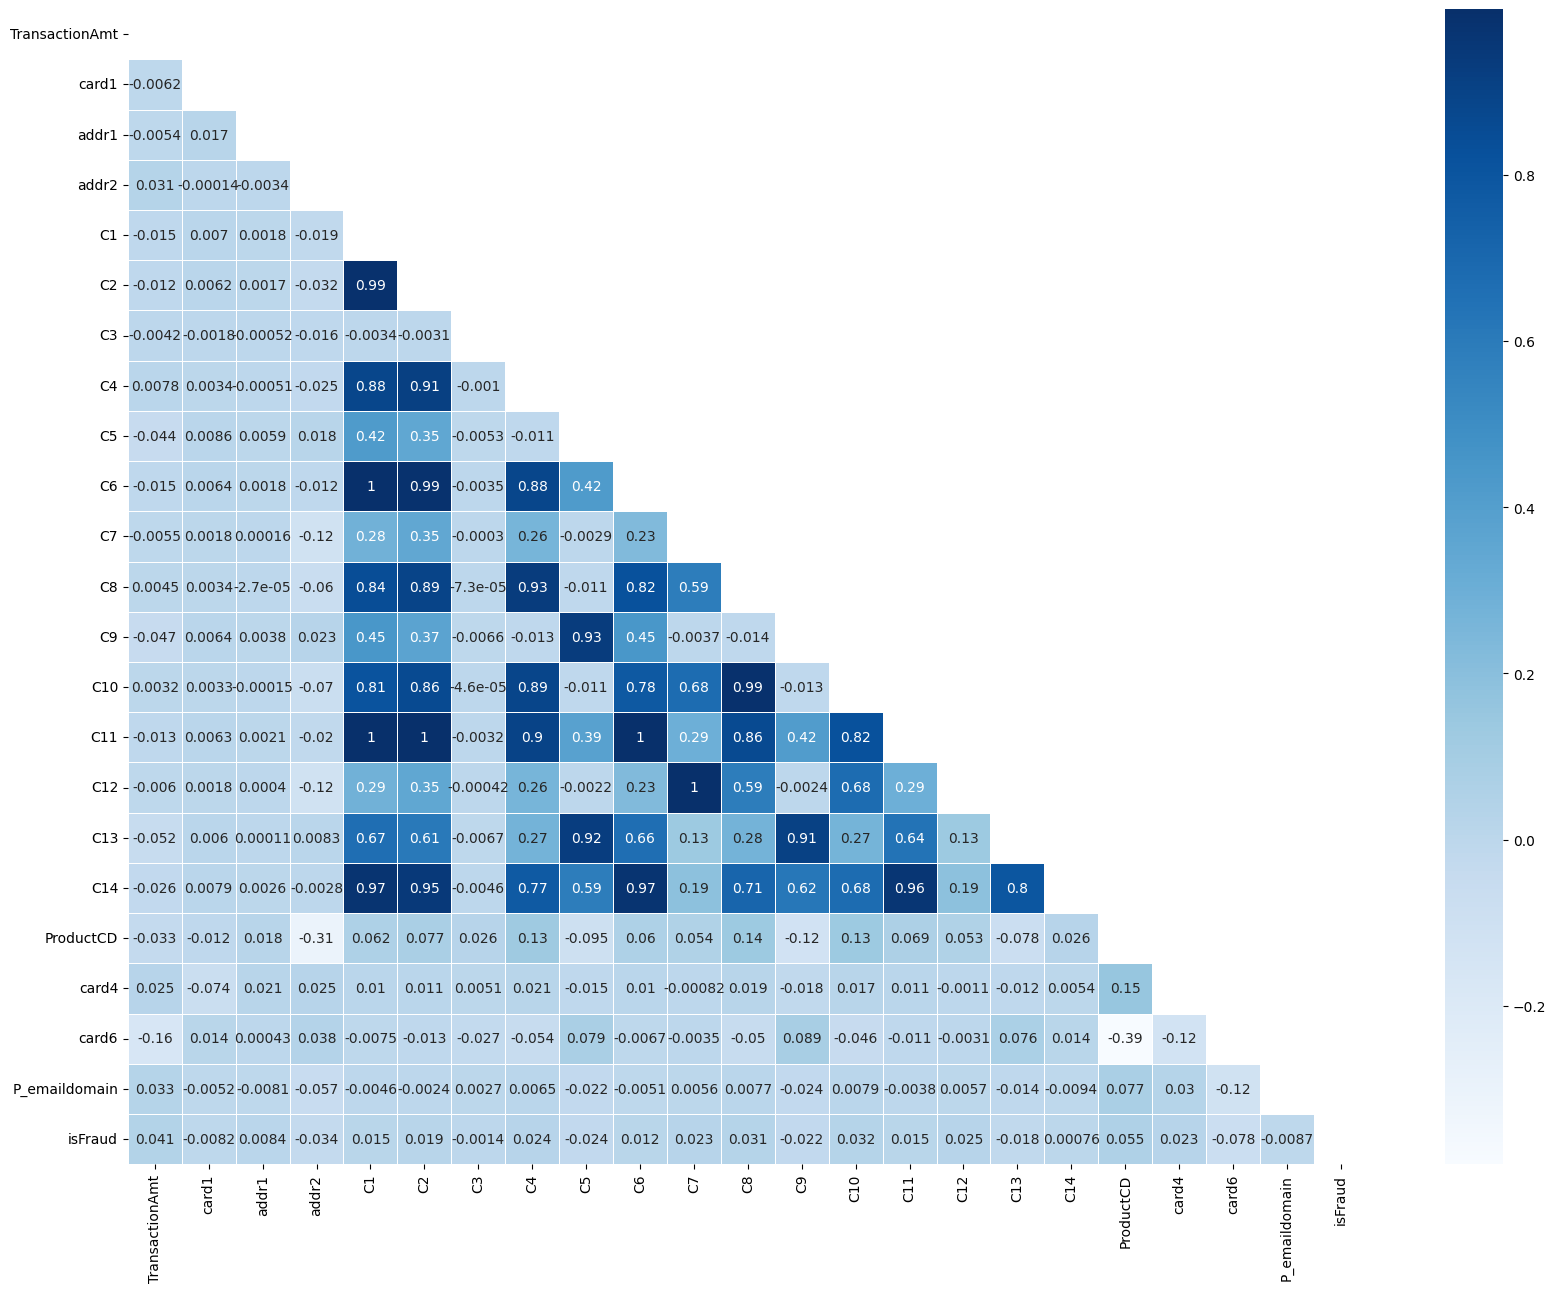

In [110]:
#Let's draw the heatmap to verify the correlation between the independent variables. 
#It is vital to know the behavior of the data used in the Machine Learning model.
plt.subplots(figsize=(20,15))
sns.heatmap(fraud.corr(), 
            cmap="Blues", 
            annot=True, 
            linewidths=.5, 
            mask=np.triu(fraud.corr()))

The headmap is very important to know the correlation among the independent variables. One can use this information to perform attribute selection. One can reduce the model complexity by dropping some highly correlated independent variables, or as I will perform further, we can use an algorithm based on a metric of importance to select the essential variables.

In [32]:
fraud=pd.concat([fraud, notnaFraud[['isFraud']]], axis=1)

In [33]:
X=fraud[['TransactionAmt','card1','addr1','addr2','ProductCD','card4','card6','P_emaildomain',
        'C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14']]
y=fraud['isFraud']

One can see that the fraud dataset is unbalanced. Usually, this kind of problem presents much more legitimate transactions than fraudulent transactions. It is not different in this case, so we have to use a technique to balance the data. As the quantity of data is enough, one can use the undersampling technique.

In [34]:
#Let's perform an undersampling to balance the data. In this case, it was used a technique of random sampling with replacement.
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

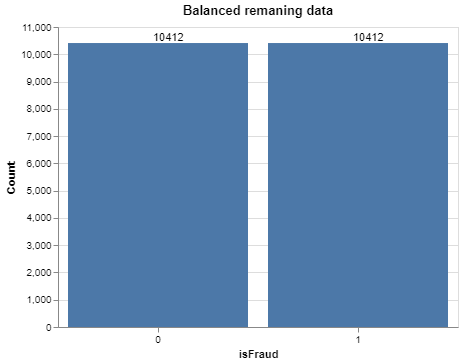

In [114]:
#Let's visually see the balanced data in a simple bar chart.
bar_chart = alt.Chart(y_rus.value_counts().reset_index().rename(columns={0:'counts'})).mark_bar().encode(
    y=alt.Y('isFraud:Q', title='Count'),
    x=alt.X('index:N', axis=alt.Axis(labelAngle=0), title='isFraud'))
bar_chart
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='isFraud:Q')
(bar_chart + text_chart).properties(height=300, width=400, title='Balanced remaning data')

Now, the two classes (legitimate and fraudulent) are balanced.